In [1]:
 %load_ext autoreload

In [2]:
 %autoreload 2

### Import libraries

In [3]:
import os

In [4]:
import sys
sys.path.append("D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/")


# Preprocess Docs

In [5]:
from preprocessing.process_data import ProcessData

In [6]:
xml_files=r"D:\corpus\DepresionEriskCollections\2019\training\xml_files"

In [32]:
user_docs=ProcessData.load_xml_files_erisk(xml_files)

Preprocessed chunk:  1


In [36]:
user_docs.keys()

dict_keys(['subject1272', 'subject2341', 'subject2432', 'subject2827', 'subject2903', 'subject2961', 'subject3707', 'subject3993', 'subject4058', 'subject436', 'subject5791', 'subject5897', 'subject6619', 'subject6635', 'subject6900', 'subject7039', 'subject9218', 'subject9454', 'subject9694', 'subject9798'])

In [37]:
ProcessData.users_dict_to_txt(r"D:\corpus\DepresionEriskCollections\2019\training\original_prep", users=user_docs)

True

In [38]:
xml_files=r"D:\corpus\DepresionEriskCollections\2019\test\xml_files"

In [39]:
test_docs=ProcessData.load_xml_files_erisk(xml_files)

Preprocessed chunk:  1


In [40]:
len(test_docs)

70

In [41]:
ProcessData.users_dict_to_txt(r"D:\corpus\DepresionEriskCollections\2019\test\original_prep", users=test_docs)

True

# Read training docs

In [23]:
from word_level_da.preprocessing.load_data import Dataset

In [24]:
data= Dataset(key="erisk18_dev", chunking=False, remove_end=True)

D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling\word_level_da\


## Positive docs

In [25]:
pos_docs=data.get_dataset(folder_name="prep_chunks_filtered", truth_name="train_golden_truth_filtered.txt",
                          partition="training")

In [15]:
len(pos_docs[0])

486

In [24]:
from classifier import explore_data 

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(pos_docs[0],index=[i for i in range (len(pos_docs[0]))], columns=["doc"])

In [27]:
df["truth"]=pos_docs[1]

In [28]:
pos_docs_1=list (df[df["truth"]==1]["doc"])

In [29]:
len(pos_docs_1)

83

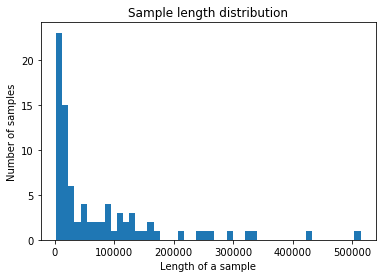

In [30]:
explore_data.plot_sample_length_distribution(pos_docs_1)

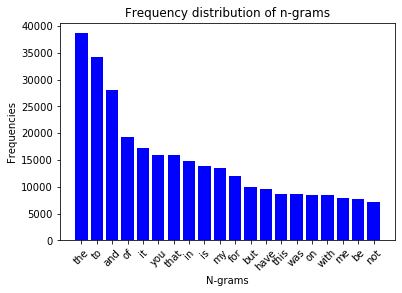

In [31]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs_1, (1,1), 20)

## Negative docs

In [32]:
pos_docs_0=list (df[df["truth"]==0]["doc"])

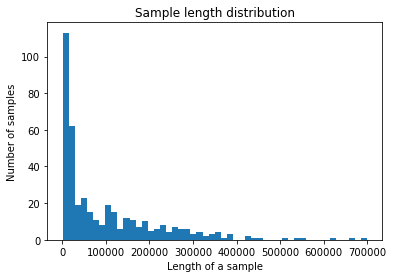

In [33]:
explore_data.plot_sample_length_distribution(pos_docs_0)

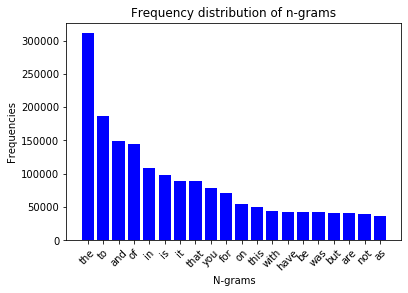

In [35]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs_0, (1,1), 20)

## Both clases

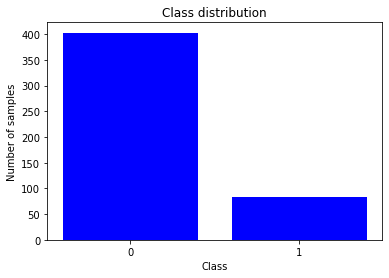

In [36]:
explore_data.plot_class_distribution(pos_docs[1])

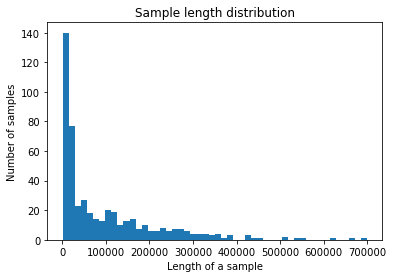

In [37]:
explore_data.plot_sample_length_distribution(pos_docs[0])

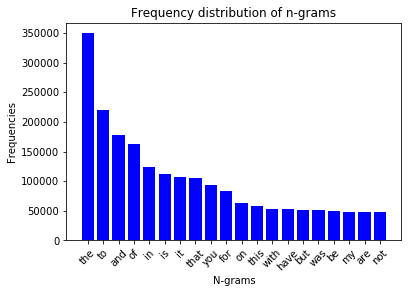

In [38]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs[0], (1,1), 20)

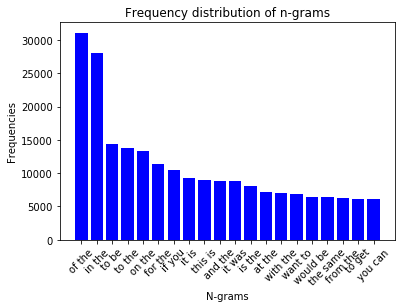

In [39]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs[0], (2,2), 20)

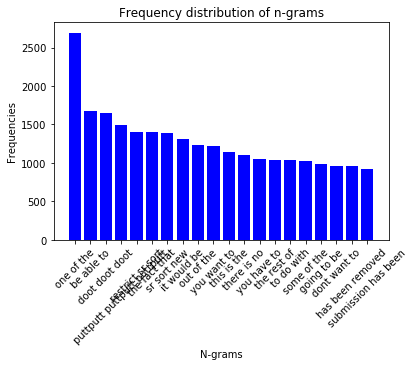

In [40]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs[0], (3,3), 20)

# Clasificacion y ganancia de informacion

In [7]:
from classifier.SVM_Text import SVM_text

In [8]:
from classifier.FeactureExtraction import feature_extraction

In [16]:
svm_obj=SVM_text(pos_docs[0], pos_docs[1], weighted=True)

## Cargar conjunto de test

In [30]:
svm_obj.extract_features(pos_docs[0], idf=True, stop_words="english", norm="l2")

# Features:  (486, 136467)
Training:  (486, 136467)
Testing:  (486, 136467)


In [31]:
svm_obj.train_and_test(pos_docs[1], p_label=1)

Confusion matrix:  [[393  10]
 [  0  83]]
Scores: [136467, 0.9794238683127572, 0.8924731182795699, 1.0, 0.9431818181818181]


[136467, 0.9794238683127572, 0.8924731182795699, 1.0, 0.9431818181818181]

In [32]:
svm_obj.ft.get_chi_2(pos_docs[1], 100)

Index(['depression', 'im', 'meds', 'anxiety', 'instad', 'feel', 'boyfriend',
       'nyx', 'therapist', 'depressed', 'ive', 'andnbsp', 'feeling', 'http',
       'really', 'diagnosed', 'relationship', 'cbt', 'contour', 'bpd',
       'therapy', 'didn', 'scars', 'depressive', 'zoloft', 'makeup',
       'venlafaxine', 'help', 'medication', 'odst', 'suicidal', 'cerave',
       'thank', 'kissed', 'psychiatrist', 'valiant', 'melatonin', 'selfharm',
       'grandeur', 'lipstick', 'psych', 'mood', 'friends', 'know', 'ocd',
       'dont', 'acne', 'diggle', 'hereditary', 'cymbalta', 'wellbutrin',
       'sober', 'zx', 'uhc', 'unmarked', 'spiders', 'xx', 'just', 'marantz',
       'pain', 'prescribed', 'hugs', 'talk', 'illness', 'dratini', 'sliggoo',
       'sleep', 'felt', 'supportive', 'nonstupid', 'anderz', 'naww', 'life',
       'things', 'alg', 'happy', 'counsellor', 'emotionally', 'coping', 'bkb',
       'relate', 'ssdi', 'like', 'bestfriend', 'cube', 'cockatrice',
       'miserable', 'handpr

## Validation

In [21]:
val=data.get_dataset(folder_name="prep_chunks", truth_name="test_golden_truth.txt",
                          partition="test", chunks=False)

In [22]:
len(val[1])

401

In [33]:
svm_obj.extract_features(val[0], idf=True, stop_words="english", norm="l2")

# Features:  (486, 136467)
Training:  (486, 136467)
Testing:  (401, 136467)


In [34]:
svm_obj.train_and_test(val[1], p_label=1)

Confusion matrix:  [[328  21]
 [ 23  29]]
Scores: [136467, 0.8902743142144638, 0.58, 0.5576923076923077, 0.5686274509803922]


[136467, 0.8902743142144638, 0.58, 0.5576923076923077, 0.5686274509803922]

# Test real

In [25]:
data2= Dataset(key="erisk18_test", chunking=False, remove_end=True)

In [26]:
test=data2.get_dataset(folder_name="prep_chunks", truth_name="test_golden_truth.txt",
                          partition="test", chunks=False)

In [35]:
svm_obj.extract_features(test[0], idf=True, stop_words="english", norm="l2")

# Features:  (486, 136467)
Training:  (486, 136467)
Testing:  (820, 136467)


In [36]:
svm_obj.train_and_test(test[1], p_label=1)

Confusion matrix:  [[707  34]
 [ 37  42]]
Scores: [136467, 0.9134146341463415, 0.5526315789473685, 0.5316455696202531, 0.5419354838709678]


[136467,
 0.9134146341463415,
 0.5526315789473685,
 0.5316455696202531,
 0.5419354838709678]